# mom6_bathy Notebook Gallery
## Example: Spherical grid with an idealized bathymetry

## 1. Import Modules

In [1]:
%%capture

from mom6_bathy.grid import Grid
from mom6_bathy.topo import Topo

## 2. Create a horizontal MOM6 grid

Spherical grid (360 x 160 deg). Grid spacing (dx, dy) = 2 deg

In [2]:
# Instantiate a MOM6 grid instance
grid = Grid(
    nx         = 180,     # Number of grid points in x direction
    ny         = 80,      # Number of grid points in y direction
    lenx       = 360.0,   # grid length in x direction (degrees)
    leny       = 160.0,   # grid length in y direction (degrees)
    cyclic_x   = True,    # non-reentrant, rectangular domain
)

### Plot grid properties:

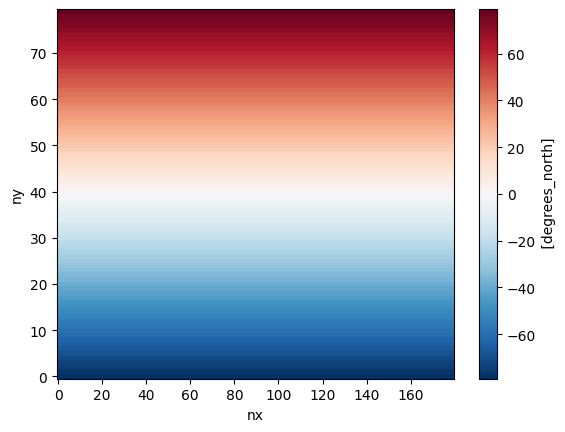

In [3]:
grid.tlat.plot();

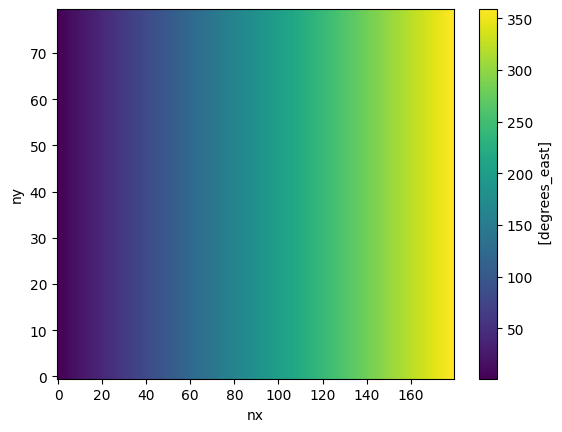

In [4]:
grid.tlon.plot();

## 3. Configure the bathymetry

In [5]:
# Instantiate a Topo object associated with the horizontal grid object (grid).
topo = Topo(grid, min_depth=10.0)

### Predefined idealized bathymetries:

`Topo` class provides three idealized bathymetry options, which are also provided by MOM6 as out-of-the-box idealized bathymetry options:

* **flat bottom:** flat bottom set to MAXIMUM_DEPTH.
* **bowl:** an analytically specified bowl-shaped basin ranging between MAXIMUM_DEPTH and MINIMUM_DEPTH.
* **spoon:** a similar shape to ‘bowl’, but with an vertical wall at the southern face.

### *flat bottom bathymetry*

In [6]:
# Set the bathymetry to be a flat bottom with a depth of 2000m
topo.set_flat(D=2000.0)

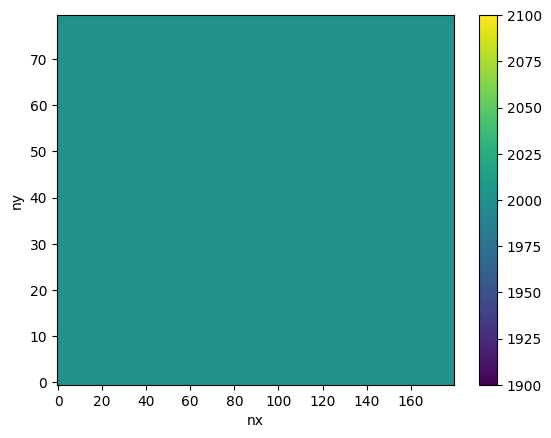

In [7]:
topo.depth.plot()

### *spoon bathymetry*

In [8]:
topo.set_spoon(500.0, 50.0, expdecay=1e8)

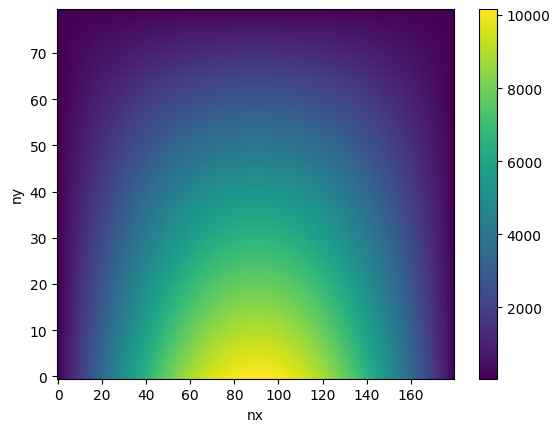

In [9]:
topo.depth.plot()

### *bowl bathymetry*

In [10]:
topo.set_bowl(100.0, 0.0, expdecay=1e8)

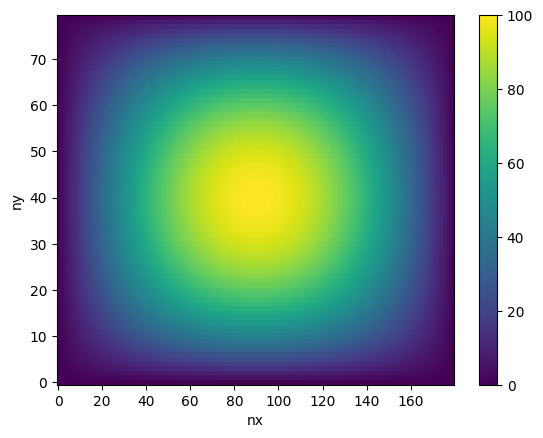

In [11]:
topo.depth.plot()

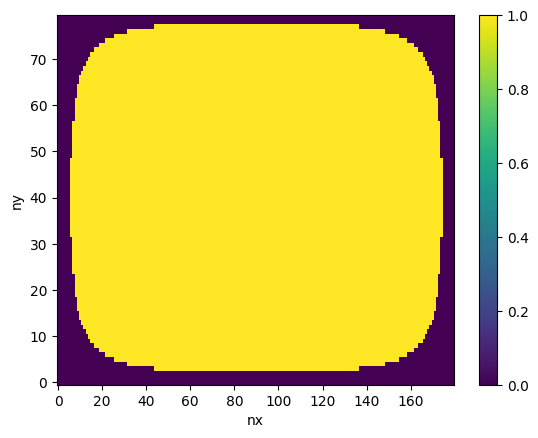

In [12]:
topo.tmask.plot()

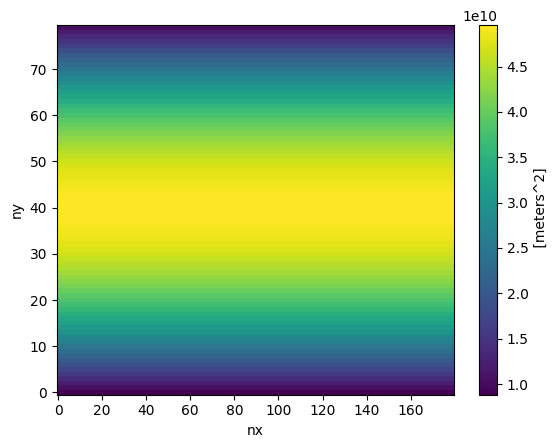

In [13]:
topo._grid.tarea.plot()

## 4. Save the grid and bathymetry files

In [14]:
# MOM6 supergrid file:
grid.write_supergrid("./ocean_hgrid_1.nc")

# MOM6 topography file:
topo.write_topo("./ocean_topog_1.nc")

# CICE grid file:
topo.write_cice_grid("./cice_grid_1.nc")

# SCRIP grid file (for runoff remapping, if needed):
topo.write_scrip_grid("./scrip_grid_1.nc")

# ESMF mesh file:
topo.write_esmf_mesh("./ESMF_mesh_1.nc")